In [5]:
import pandas as pd

# Load dataset
df = pd.read_csv(r"C:\Users\hp\Downloads\archive\Sample - Superstore.csv", encoding="ISO-8859-1")

# ----- Basic Cleaning -----

# 1. Preview data
print("Before Cleaning:\n", df.head())
print("\nShape:", df.shape)

# 2. Remove duplicates
df = df.drop_duplicates()

# 3. Handle missing values
# Drop rows where critical columns (like Sales, Order Date) are missing
df = df.dropna(subset=["Sales", "Order Date"])

# For other columns, fill missing values if needed
df["Discount"] = df["Discount"].fillna(0)
df["Profit"] = df["Profit"].fillna(0)

# 4. Standardize column names
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# 5. Convert dates
df["order_date"] = pd.to_datetime(df["order_date"], errors="coerce")
df["ship_date"] = pd.to_datetime(df["ship_date"], errors="coerce")

# 6. Remove invalid values
df = df[df["sales"] >= 0]   # remove negative sales if exist
df = df[df["quantity"] > 0] # remove zero/negative quantity

# 7. Save cleaned dataset
df.to_csv("sales_clean.csv", index=False)

print("\nAfter Cleaning:\n", df.head())
print("\nShape after cleaning:", df.shape)


Before Cleaning:
    Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0 

Shape of dataset: (9994, 21)

Column names:
 Index(['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode',
       'customer_id', 'customer_name', 'segment', 'country', 'city', 'state',
       'postal_code', 'region', 'product_id', 'category', 'sub-category',
       'product_name', 'sales', 'quantity', 'discount', 'profit'],
      dtype='object')

Data types:
 row_id             int64
order_id          object
order_date        object
ship_date         object
ship_mode         object
customer_id       object
customer_name     object
segment           object
country           object
city              object
state             object
postal_code        int64
region            object
product_id        object
category          object
sub-category      object
product_name      object
sales            float64
quantity           int64
discount         float64
profit           float64
dtype: object

Missing values:
 row_id           0
order_id         0
order_date       0
ship_date        

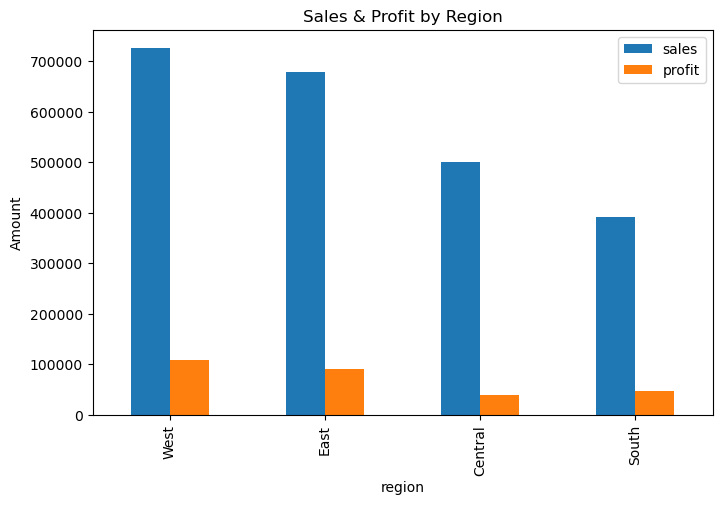


Sales by Category:
                        sales       profit
category                                 
Furniture        741999.7953   18451.2728
Office Supplies  719047.0320  122490.8008
Technology       836154.0330  145454.9481


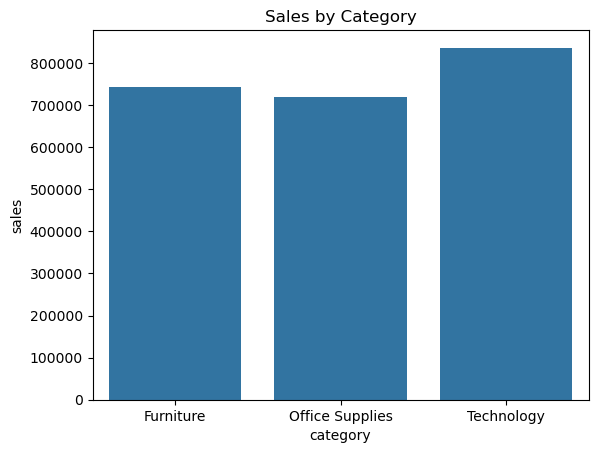


Top 10 Products by Sales:
 product_name
Canon imageCLASS 2200 Advanced Copier                                          61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind    27453.384
Cisco TelePresence System EX90 Videoconferencing Unit                          22638.480
HON 5400 Series Task Chairs for Big and Tall                                   21870.576
GBC DocuBind TL300 Electric Binding System                                     19823.479
GBC Ibimaster 500 Manual ProClick Binding System                               19024.500
Hewlett Packard LaserJet 3310 Copier                                           18839.686
HP Designjet T520 Inkjet Large Format Printer - 24" Color                      18374.895
GBC DocuBind P400 Electric Binding System                                      17965.068
High Speed Automatic Electric Letter Opener                                    17030.312
Name: sales, dtype: float64


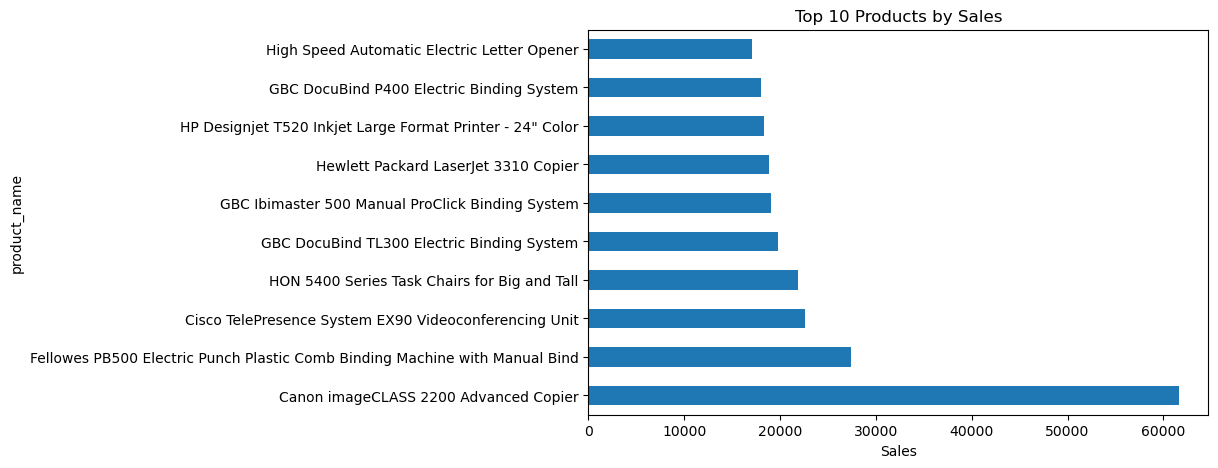

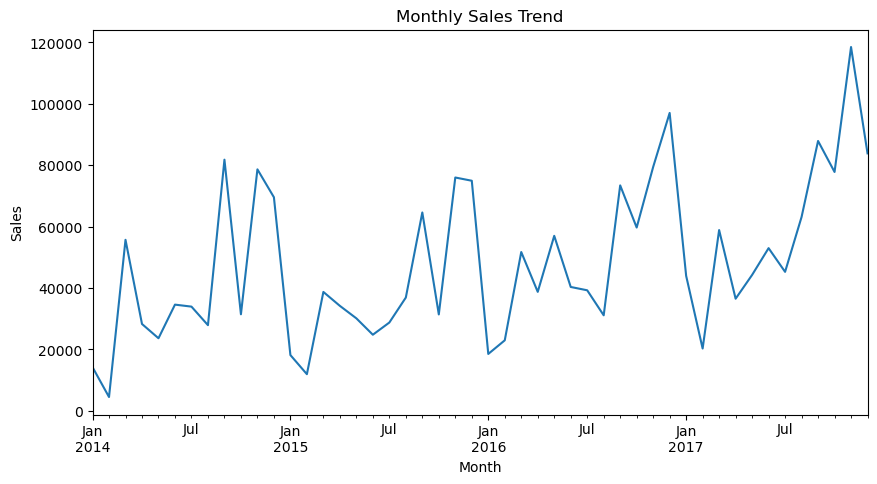

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned data
df = pd.read_csv("sales_clean.csv")

# ----- Basic Info -----
print("Shape of dataset:", df.shape)
print("\nColumn names:\n", df.columns)
print("\nData types:\n", df.dtypes)
print("\nMissing values:\n", df.isnull().sum())

# ----- Summary Stats -----
print("\nSummary statistics:\n", df.describe())

# ----- Exploratory Analysis -----

# 1. Total Sales & Profit
print("\nTotal Sales:", df['sales'].sum())
print("Total Profit:", df['profit'].sum())

# 2. Sales by Region
region_sales = df.groupby('region')[['sales', 'profit']].sum().sort_values('sales', ascending=False)
print("\nSales by Region:\n", region_sales)

# Plot
region_sales[['sales', 'profit']].plot(kind='bar', figsize=(8,5))
plt.title("Sales & Profit by Region")
plt.ylabel("Amount")
plt.show()

# 3. Sales by Category
cat_sales = df.groupby('category')[['sales', 'profit']].sum()
print("\nSales by Category:\n", cat_sales)

sns.barplot(x=cat_sales.index, y=cat_sales['sales'])
plt.title("Sales by Category")
plt.show()

# 4. Top 10 Products by Sales
top_products = df.groupby('product_name')['sales'].sum().nlargest(10)
print("\nTop 10 Products by Sales:\n", top_products)

top_products.plot(kind='barh', figsize=(8,5))
plt.title("Top 10 Products by Sales")
plt.xlabel("Sales")
plt.show()

# 5. Monthly Sales Trend
df['order_date'] = pd.to_datetime(df['order_date'])
monthly_sales = df.groupby(df['order_date'].dt.to_period("M"))['sales'].sum()

monthly_sales.plot(figsize=(10,5))
plt.title("Monthly Sales Trend")
plt.ylabel("Sales")
plt.xlabel("Month")
plt.show()
